In [5]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as ply
import scipy as sp
from math import isnan
from collections import Counter
from re import sub
from decimal import Decimal
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np

AttributeError: module 'pandas' has no attribute 'core'

In [2]:
#convert the CSV files to readable data.
investment_db = read_csv('/Users/bobby/Coding/DataScienceLearning/IB_ESS_IA/Database/EnergyInvestments.csv', engine='python')
income_db = read_csv('/Users/bobby/Coding/DataScienceLearning/IB_ESS_IA/Database/Unemployment.csv', engine='python')

In [3]:
#Extract data out of the databases
#First, create lists out of the CSV Data
money = investment_db.values
median_income = income_db.values
#Second, remove the first couple rows of median income because they aren't useful as well as the last rows
median_income = median_income[7:3196]
#Next, create the Y axis for the graph by taking the values of each county and their investment and combine them together using a dictionary, then combine each key to make the actual total investment

Y_Values = {}
for i in money:
    if i[1] not in Y_Values:
        if type(i[1]) == float: 
            if isnan(i[1]) == True: Y_Values['marshall islands'] = int(Decimal(sub(r'[^\d.]', '', i[4])))
        else:   Y_Values[i[1]] = int(Decimal(sub(r'[^\d.]', '', i[4])))
    elif i[1] in Y_Values:
        Y_Values[i[1]] = Y_Values[i[1]] + int(Decimal(sub(r'[^\d.]', '', i[4])))

#Then, create the 2 groups of X values for each graph using the same method

X_Values_Median = {}
X_Values_Average = {}

for i in median_income:
    try:
        County_name = i[2]
        County_name = County_name[0:County_name.find('County')]
        if isinstance(i[54], str) == True:  X_Values_Median[County_name.strip()] = int(Decimal(sub(r'[^\d.]', '', i[54])))
    except KeyError:
        pass
#TODO FINISH WITH THE AVERAGE

xvaluem = {}
yvalue = {}
#Second to last, we need to make the lists uniform size, so cross-reference the counties in each list

county_list = set(X_Values_Median.keys()) & set(Y_Values.keys())
#Finally, Create two final lists for X and Y values to finish everything
x = []
y = []
for i in county_list:
    x.append(X_Values_Median[i])
    y.append(Y_Values[i])

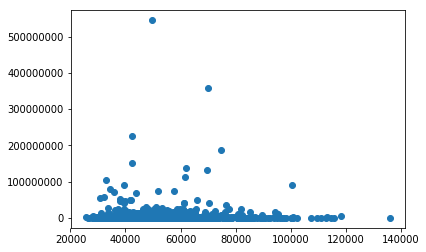

In [4]:
#Now, create graphs for use in the paper and analysis
ply.figure()
ply.ticklabel_format(style='plain')
ply.scatter(x, y, norm=None)

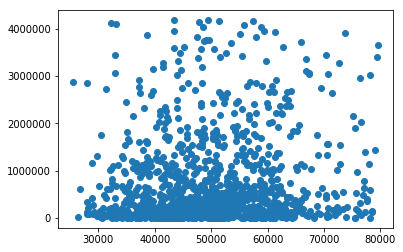

In [5]:
# as you can see, a majority of the data is clustered between 0 and 100000000 on the Y axis, so to get a better view of the data, those data points will be removed.
def remove_outliers(x, y):
    zipped = []
    for i in range(0, len(y)):
        zipped.append([x[i], y[i]])
    dataframe_1 = DataFrame(zipped)
    Q1 = dataframe_1.quantile(0.25)
    Q3 = dataframe_1.quantile(0.75)
    IQR = Q3 - Q1
    dataframe_out = dataframe_1[~((dataframe_1 < (Q1 - 1.5 * IQR)) |(dataframe_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
    no_outliers = dataframe_out.values
    x = []
    y = []
    for i in no_outliers:
        x.append(i[0])
        y.append(i[1])
    return x, y, dataframe_1
x, y, stateframe = remove_outliers(x, y)
#Now, X and Y contain no outliers in the data allowing for a better examation of the data.
ply.figure()
ply.ticklabel_format(style='plain')
ply.scatter(x, y, norm=None)

In [6]:
#As it can be seen, there is near no correlation between the two on a national scale. However, to further examine this, we will seperate the data by states.
#First, gather a list of every state
states = []
for i in money: states.append(i[0])
states = set(states)

#Next, seperate the data by state
state_data_investment = {}
for i in states:
    statestuff = {}
    for j in money:
        if j[0] == i:
            number = int(Decimal(sub(r'[^\d.]', '', j[4])))
            statestuff[j[1]] = number
    state_data_investment[i] = statestuff


#For the Median Income, the states are formatted differently, so a new states list must be made
states = []
states_conversion_list = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa','ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky','LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia','VI': 'Virgin Islands', 'VT': 'Vermont','WA': 'Washington', 'WI': 'Wisconsin','WV': 'West Virginia', 'WY': 'Wyoming', 'US': 'United States', 'Co': 'Colorade'}
for i in median_income: states.append(i[1])
states = set(states)
state_data_income = {}
for i in states:
    statestuff = {}
    for j in median_income:
        if j[1] == i:
            County_name = j[2]
            County_name = County_name[0:County_name.find('County')]
            if isinstance(j[54], str) == True:
                statestuff[County_name.strip()] = int(Decimal(sub(r'[^\d.]', '', j[54])))
    state_data_income[states_conversion_list[i]] = statestuff

In [15]:
#Now seperate the data and create new graphs!

def make_state_graph(state_income, state_investment):
    county_list = set(state_income.keys()) & set(state_investment.keys())
    x = []
    y = []
    for i in county_list:
        x.append(state_income[i])
        y.append(state_investment[i])
    return x, y
for i in state_data_income.keys():
    try:
        x, y = make_state_graph(state_data_income[i], state_data_investment[i])
        x, y = remove_outliers(x, y)
        ply.figure()
        ply.ticklabel_format(style='plain')
        ply.title(i)
        ply.scatter(x, y)
    except:
        pass

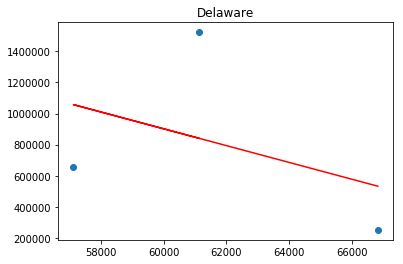

Delaware r= -0.4059265011438949
Maine r= -0.42449619810515177
Oklahoma r= 0.13665130137559486
Kentucky r= 0.07388783815563757
Iowa r= -0.03831404735354829
New Jersey r= -0.1819463250830936
North Dakota r= -0.10821692147239732
South Carolina r= -0.0620307104299667
Arizona r= -0.24102792709080206
Georgia r= -0.24797462751138866
Ohio r= 0.09600345797980488
Nevada r= 0.2769879408132702
Wyoming r= 0.22671133193594578
Michigan r= -0.24922139081649886
North Carolina r= 0.05853617028077407
Florida r= -0.040205336080616855
Wisconsin r= 0.12841277624533373
Minnesota r= 0.05530203413860687
California r= -0.1867191901994107
Washington r= 0.13281376536133074
Virginia r= 0.057180939654362384
South Dakota r= 0.1915112562204041
Idaho r= -0.3859008157705401
West Virginia r= 0.06046114277616438
Indiana r= 0.19061186545120487
Missouri r= 0.1123226800946351
Rhode Island r= 0.9998733303063028
New York r= -0.07187211201479313
New Hampshire r= 0.10838614335490394
Pennsylvania r= -0.0877196593322415
Mississip

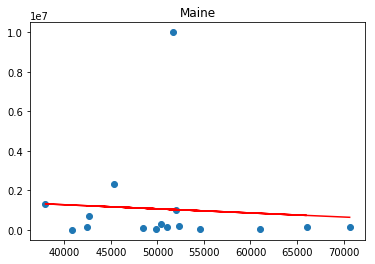

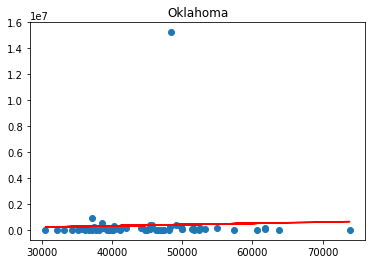

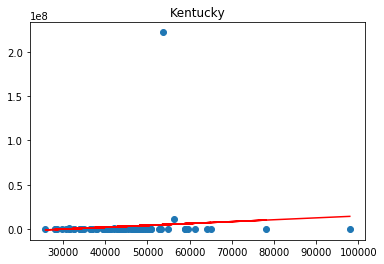

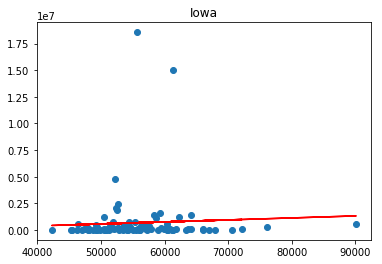

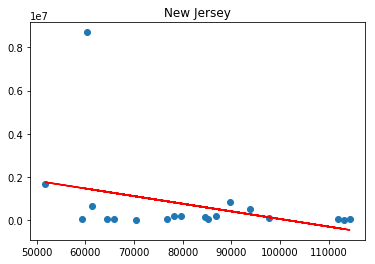

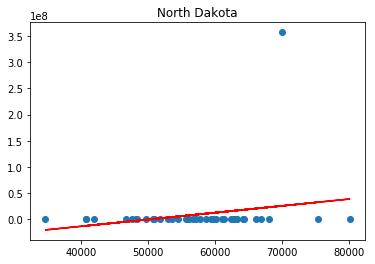

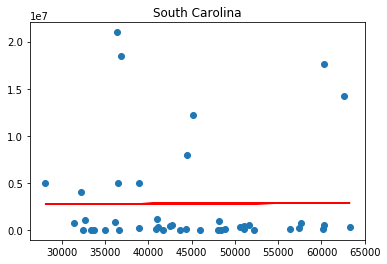

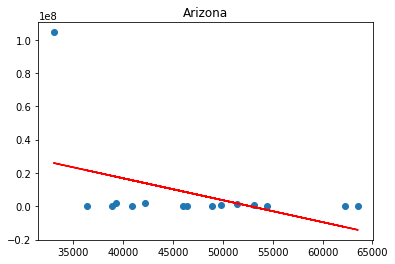

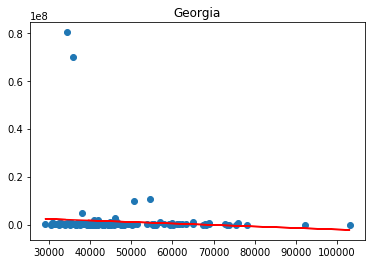

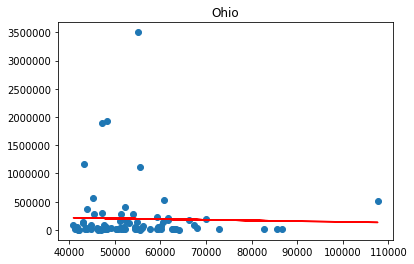

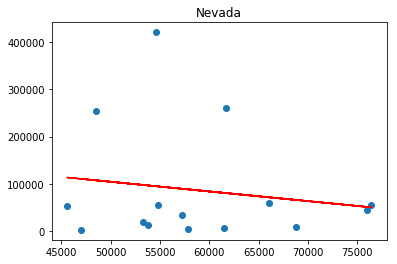

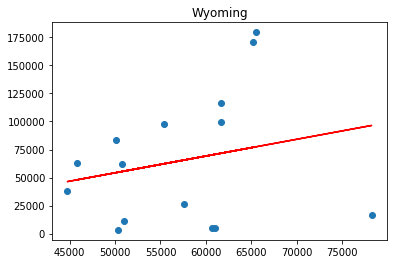

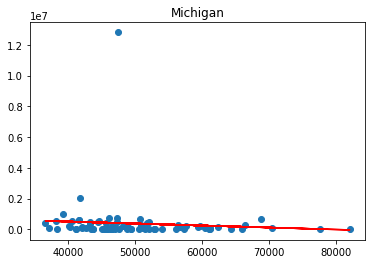

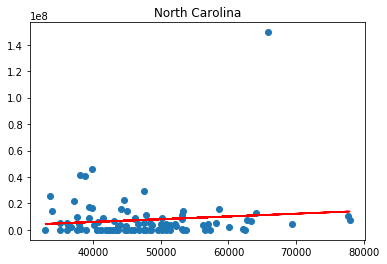

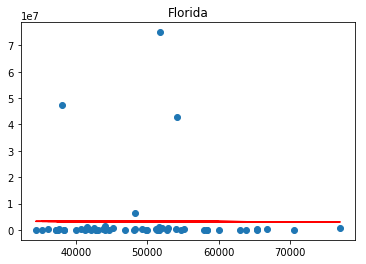

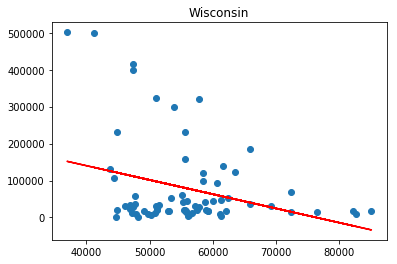

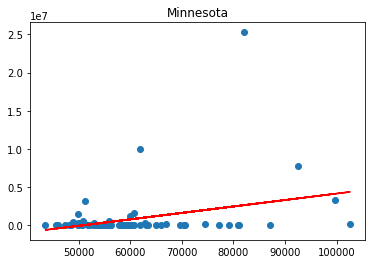

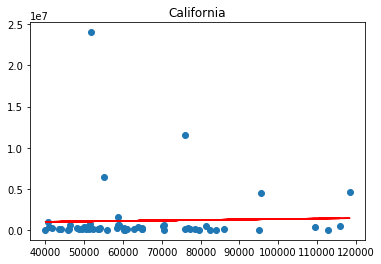

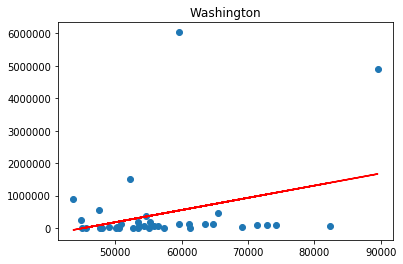

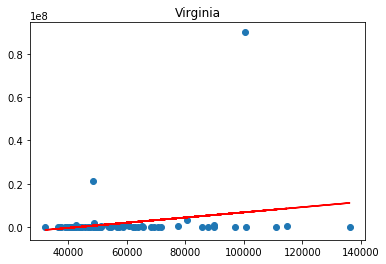

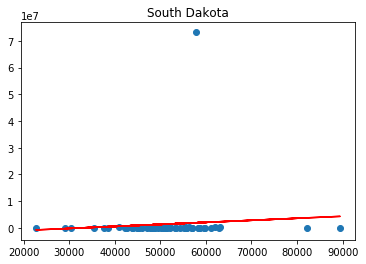

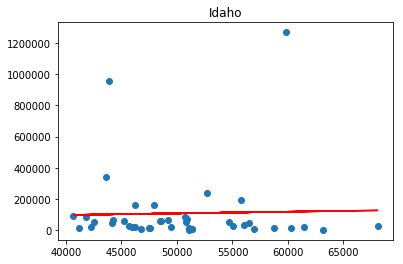

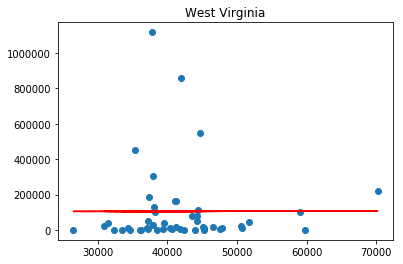

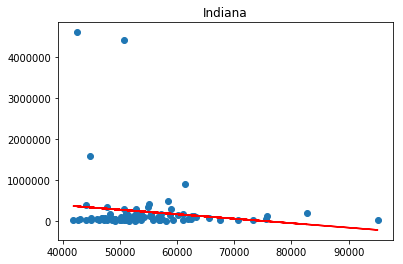

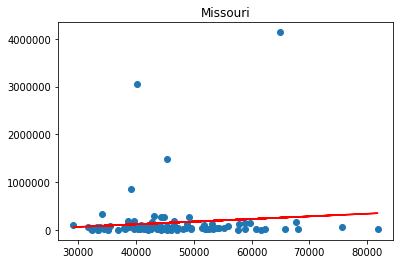

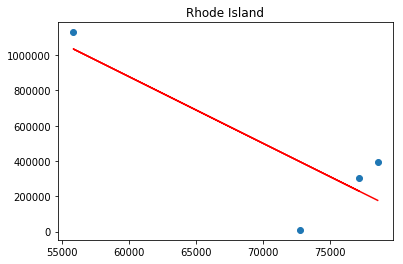

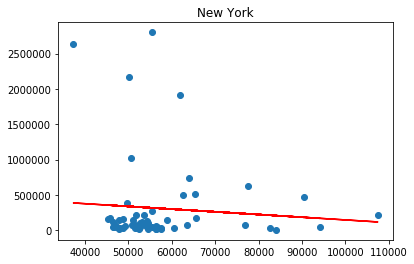

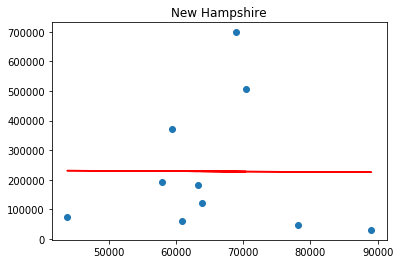

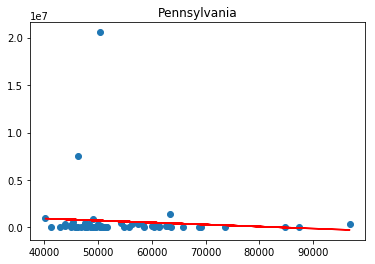

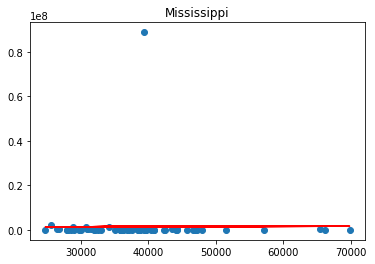

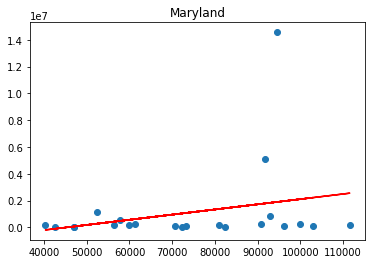

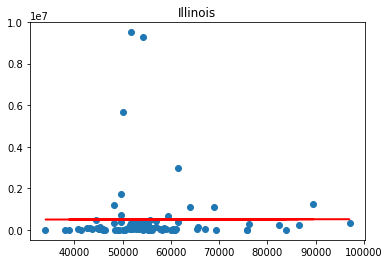

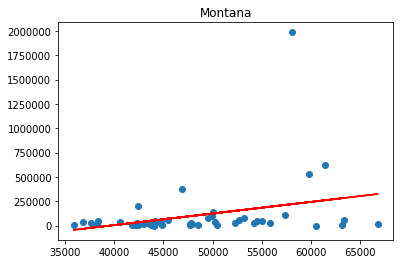

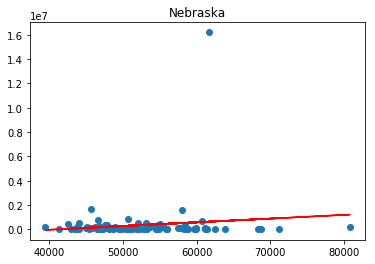

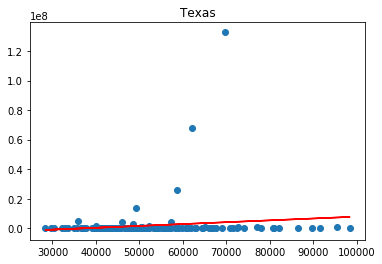

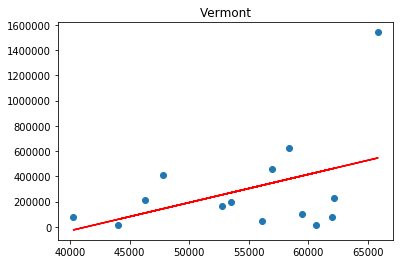

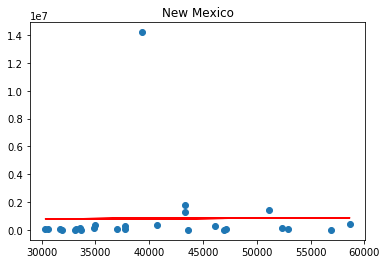

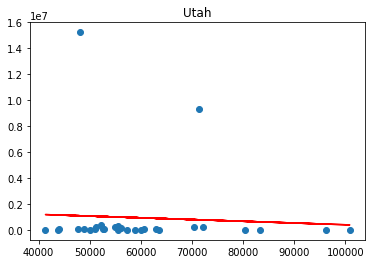

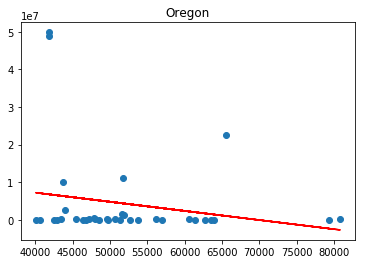

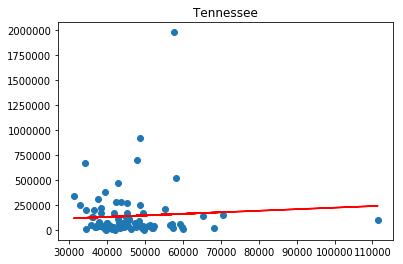

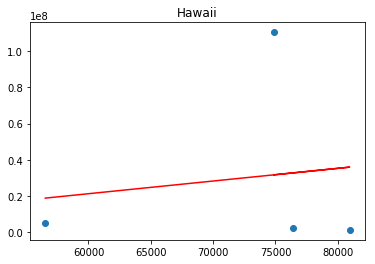

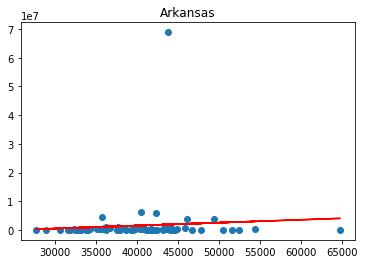

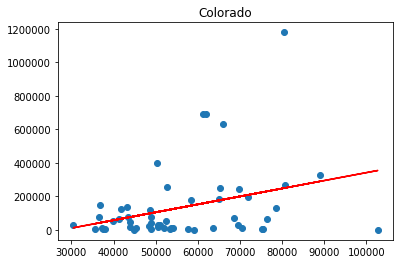

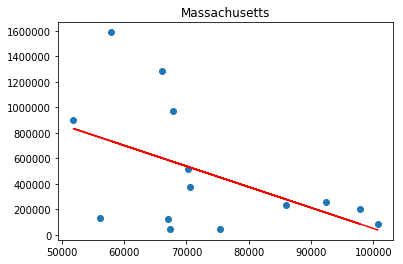

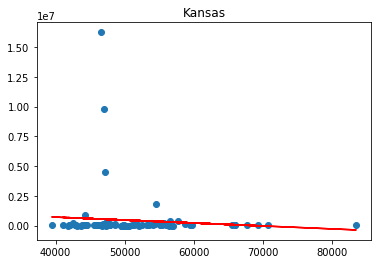

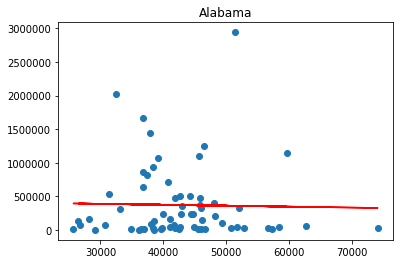

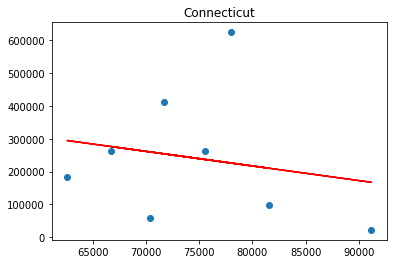

In [24]:
#Now, each state has varying strengths of correlation individually, making the data semi-clearer. First, we will perform a linear-regression on each of the states.
state_bestfit = {}
for i in state_data_income.keys():
    try:
        x, y = make_state_graph(state_data_income[i], state_data_investment[i])
        x, y, stateframe = remove_outliers(x, y)
        X = stateframe.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
        Y = stateframe.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(X, Y)  # perform linear regression
        Y_pred = linear_regressor.predict(X)  # make predictions
        ply.scatter(X, Y)
        ply.plot(X, Y_pred, color='red')
        ply.title(i)
        ply.show()
        r = np.corrcoef(x, y)
        state_bestfit[i] = [linear_regressor.coef_, r] # save the coefficient and r
        print(i +' r= ' + str(r[0][1]))
    except:    pass

In [39]:
#now, we have graphs and a line of best fit for each state, so the next step is to test the validity of our Hypotheses.
#The H0 for all tests will be ρ=0, and Ha will be that p>=0, where p is the population correlation coefficient
#To test for the P-value, I will perform a two-sample T-test on each state, where the significance level is .1
H0_states = {}
Ha_states = {}
for i in state_data_income.keys():
    try:
        x, y = make_state_graph(state_data_income[i], state_data_investment[i])
        ttest, pval = stats.ttest_ind(x, y)
        if pval <= .1:  H0_states[i] = pval
        elif pval >= .1:   Ha_states[i] = pval
    except: pass


In [1]:
#finally, export the data to a csv to use in the experiment
zipper = []
for i in state_bestfit.keys():
    z = []
    z.append(i)
    thing = state_bestfit[i]
    bestfit = str(thing[0])
    z.append(bestfit[2:-2])
    z.append(thing[1])
    try:    
        z.append(H0_states[i])
        z.append('H0')
        zipper.append(z)
    except: 
        z.append(Ha_states[i])
        z.append('Ha')
        zipper.append(z)
dataframe = DataFrame(zipper)
dataframe.columns = ['State', 'Line of Best Fit', 'r value', 'P-Value', 'H0 or Ha']
dataframe.to_csv('/Users/bobby/Coding/DataScienceLearning/IB_ESS_IA/Database/Final_data', sep='\t')

NameError: name 'state_bestfit' is not defined